Step1: Loading and initial understanding of the data

In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

Step2: Check for missing values

In [ ]:
# Step 2: Check for missing values
missing_values = df.isnull().sum()

# Fill missing values if any (this dataset has none, but we'll show how to handle it)
# For demonstration, use median for numeric columns (if there were missing values)
df_filled = df.fillna(df.median(numeric_only=True))

print(df.isnull().sum())



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Step3: Categorical Encoding

In [ ]:
# Step 3: One-Hot Encode categorical variables
# We'll treat 'cp', 'thal', 'slope' and 'restecg' as categorical and apply one-hot encoding

df_encoded = pd.get_dummies(df_filled, columns=['cp', 'thal', 'slope', 'restecg'], drop_first=True)

# Show resulting dataframe structure
df_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,False,False,False,False,False,True,False,True,True,False
1,53,1,140,203,1,155,1,3.1,0,0,False,False,False,False,False,True,False,False,False,False
2,70,1,145,174,0,125,1,2.6,0,0,False,False,False,False,False,True,False,False,True,False
3,61,1,148,203,0,161,0,0.0,1,0,False,False,False,False,False,True,False,True,True,False
4,62,0,138,294,1,106,0,1.9,3,0,False,False,False,False,True,False,True,False,True,False


Step4: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 4: Feature Scaling
# Separate features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling later
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Show a preview of the scaled features
X_scaled_df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,restecg_1,restecg_2
0,-0.268437,0.661504,-0.377636,-0.659332,-0.418878,0.821321,-0.712287,-0.060888,1.209221,-0.441179,-0.619085,-0.284998,-0.258065,-1.063474,1.224745,-0.942158,1.088807,0.999025,-0.121867
1,-0.158157,0.661504,0.479107,-0.833861,2.387330,0.255968,1.403928,1.727137,-0.731971,-0.441179,-0.619085,-0.284998,-0.258065,-1.063474,1.224745,-0.942158,-0.918436,-1.000976,-0.121867
2,1.716595,0.661504,0.764688,-1.396233,-0.418878,-1.048692,1.403928,1.301417,-0.731971,-0.441179,-0.619085,-0.284998,-0.258065,-1.063474,1.224745,-0.942158,-0.918436,0.999025,-0.121867
3,0.724079,0.661504,0.936037,-0.833861,-0.418878,0.516900,-0.712287,-0.912329,0.238625,-0.441179,-0.619085,-0.284998,-0.258065,-1.063474,1.224745,-0.942158,1.088807,0.999025,-0.121867
4,0.834359,-1.511706,0.364875,0.930822,2.387330,-1.874977,-0.712287,0.705408,2.179817,-0.441179,-0.619085,-0.284998,-0.258065,0.940314,-0.816497,1.061393,-0.918436,0.999025,-0.121867


Step5: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

# Show the size of each split
split_sizes = {
    "X_train shape": X_train.shape,
    "X_test shape": X_test.shape,
    "y_train shape": y_train.shape,
    "y_test shape": y_test.shape
}

split_sizes


{'X_train shape': (820, 19),
 'X_test shape': (205, 19),
 'y_train shape': (820,),
 'y_test shape': (205,)}

1. logistic regression

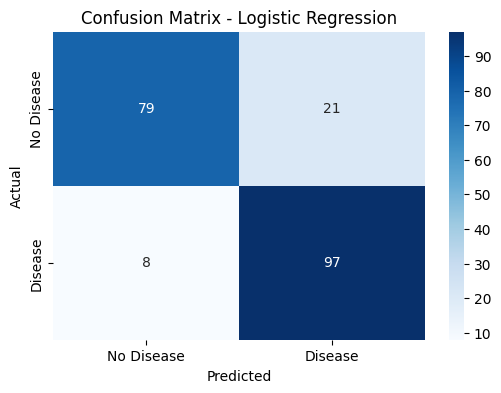

(0.8585365853658536,
               precision    recall  f1-score     support
 0              0.908046  0.790000  0.844920  100.000000
 1              0.822034  0.923810  0.869955  105.000000
 accuracy       0.858537  0.858537  0.858537    0.858537
 macro avg      0.865040  0.856905  0.857437  205.000000
 weighted avg   0.863991  0.858537  0.857743  205.000000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Show accuracy and classification report
accuracy, pd.DataFrame(report).transpose()


Cross Validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

# Step 1: Load data
df = pd.read_csv("heart.csv")
df.fillna(df.median(numeric_only=True), inplace=True)
df_encoded = pd.get_dummies(df, columns=['cp','thal','slope','restecg'], drop_first=True)

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Define model and metrics
logreg = LogisticRegression(max_iter=1000, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_macro = cross_val_score(logreg, X_scaled, y, scoring=make_scorer(f1_score, average='macro'), cv=cv)
roc_auc = cross_val_score(logreg, X_scaled, y, scoring='roc_auc', cv=cv)

# Step 4: Print results
print("Logistic Regression Cross-Validation Results:")
print(f"Macro-F1 Mean: {np.mean(f1_macro):.4f}")
print(f"Macro-F1 Std: {np.std(f1_macro):.4f}")
print(f"ROC-AUC Mean: {np.mean(roc_auc):.4f}")
print(f"ROC-AUC Std: {np.std(roc_auc):.4f}")


Logistic Regression Cross-Validation Results:
Macro-F1 Mean: 0.8539
Macro-F1 Std: 0.0052
ROC-AUC Mean: 0.9239
ROC-AUC Std: 0.0085


RFE Feature Selection

In [ ]:
import pandas as pd


df = pd.read_csv('heart.csv')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Perform RFE again with 10 selected features
rfe_10 = RFE(logreg, n_features_to_select=10)
rfe_10.fit(X_train, y_train)

# Extract selected features
selected_features_10 = X.columns[rfe_10.support_]
selected_features_10


Index(['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')

Retrain the model

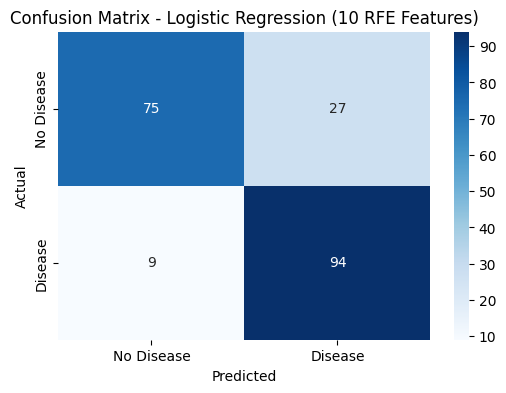

(0.824390243902439,
               precision    recall  f1-score    support
 0              0.892857  0.735294  0.806452  102.00000
 1              0.776860  0.912621  0.839286  103.00000
 accuracy       0.824390  0.824390  0.824390    0.82439
 macro avg      0.834858  0.823958  0.822869  205.00000
 weighted avg   0.834575  0.824390  0.822949  205.00000)

In [ ]:
# Subset data using the 10 selected features
X_train_rfe_10 = X_train[selected_features_10]
X_test_rfe_10 = X_test[selected_features_10]

# Retrain logistic regression using 10 selected features
logreg_rfe_10 = LogisticRegression(max_iter=1000, random_state=42)
logreg_rfe_10.fit(X_train_rfe_10, y_train)

# Predict on test set
y_pred_rfe_10 = logreg_rfe_10.predict(X_test_rfe_10)

# Evaluation
accuracy_rfe_10 = accuracy_score(y_test, y_pred_rfe_10)
report_rfe_10 = classification_report(y_test, y_pred_rfe_10, output_dict=True)
conf_matrix_rfe_10 = confusion_matrix(y_test, y_pred_rfe_10)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rfe_10, annot=True, fmt='d', cmap="Blues",
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (10 RFE Features)')
plt.show()

# Return accuracy and classification report
accuracy_rfe_10, pd.DataFrame(report_rfe_10).transpose()


SHAP Analysis

   Feature  Mean_Abs_SHAP
1       cp       0.731147
6  oldpeak       0.721188
8       ca       0.651871
9     thal       0.637543
0      sex       0.577774
4  thalach       0.452456
5    exang       0.374665
7    slope       0.289416
3  restecg       0.219506
2      fbs       0.088751


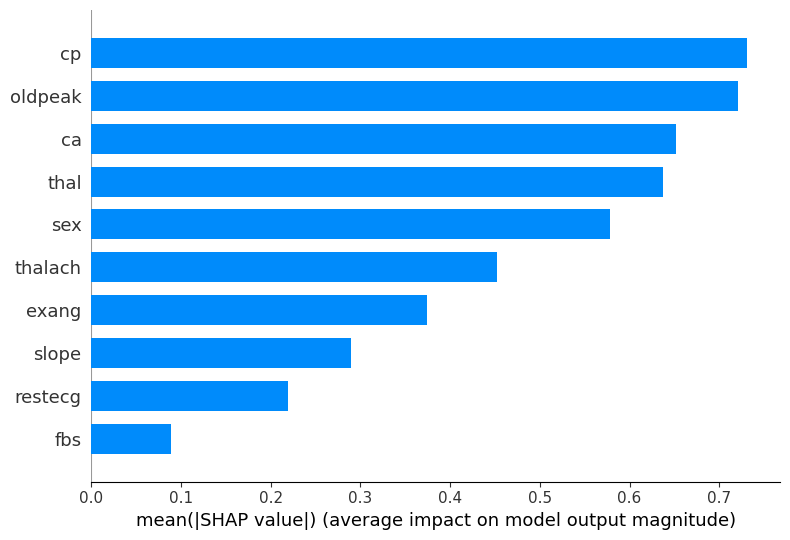

In [6]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Interpreting the Logistic Regression Model Using SHAP
explainer = shap.Explainer(logreg_rfe_10, X_test_rfe_10)
shap_values = explainer(X_test_rfe_10)

# 2. Extract SHAP values ​​and calculate the mean absolute value
shap_values_array = shap_values.values
mean_abs_shap = np.abs(shap_values_array).mean(axis=0)

# 3. Print the average SHAP value corresponding to each feature
shap_importance_df = pd.DataFrame({
    'Feature': X_test_rfe_10.columns,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

print(shap_importance_df)

shap.summary_plot(shap_values, X_test_rfe_10, plot_type="bar")
